Exercise 1

In [2]:
pip install pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 4.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 10.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 25.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


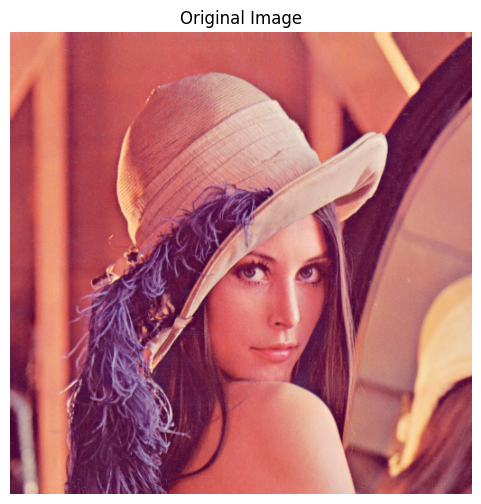

In [6]:
#1.Read the image using pillow library and display it.
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
image_path = "/Users/sneharaut/Desktop/Lenna_(test_image).png"
image = Image.open(image_path)

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

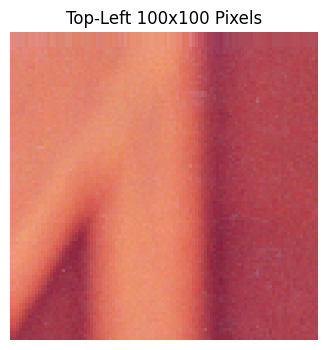

In [7]:
# 2. Display only the top-left corner (100x100 pixels)
numpy_image = np.array(image)
top_left = numpy_image[:100, :100]

plt.figure(figsize=(4, 4))
plt.imshow(top_left)
plt.title("Top-Left 100x100 Pixels")
plt.axis("off")
plt.show()

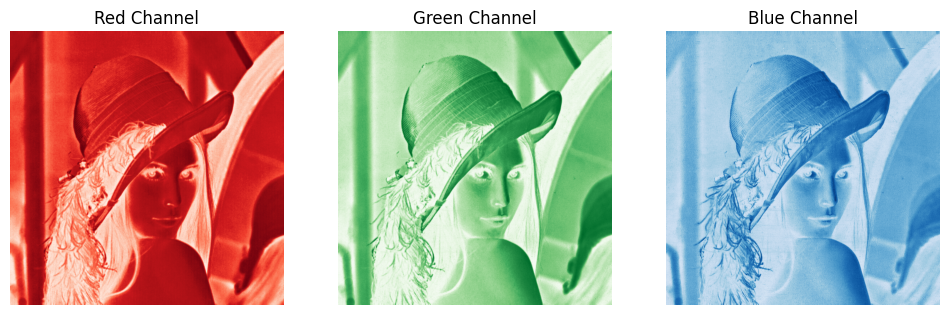

In [8]:
# 3. Show the three color channels (R, G, B)
r_channel = numpy_image[:, :, 0] #all row, all column and red
g_channel = numpy_image[:, :, 1]
b_channel = numpy_image[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(r_channel, cmap="Reds")
axes[0].set_title("Red Channel")
axes[0].axis("off")

axes[1].imshow(g_channel, cmap="Greens")
axes[1].set_title("Green Channel")
axes[1].axis("off")

axes[2].imshow(b_channel, cmap="Blues")
axes[2].set_title("Blue Channel")
axes[2].axis("off")

plt.show()

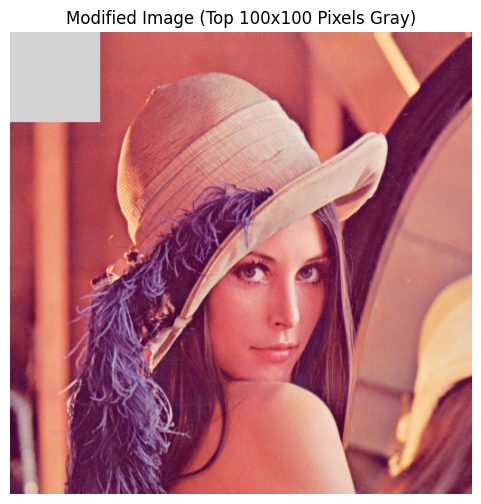

In [9]:
#4.Modify the top 100x100 pixels to a value of 210 (light gray)
modified_image = numpy_image.copy()
modified_image[:100, :100] = 210

plt.figure(figsize=(6, 6))
plt.imshow(modified_image)
plt.title("Modified Image (Top 100x100 Pixels Gray)")
plt.axis("off")
plt.show()

Exdercise 2:

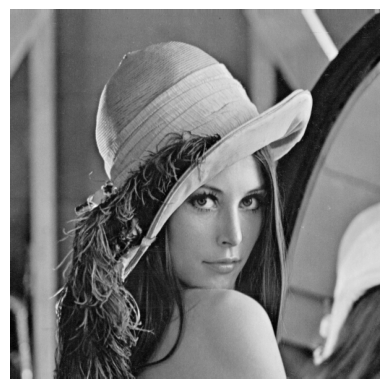

In [11]:
#1.Lode a grayscale image using the pillow and display using matplotlib
from PIL import Image
import matplotlib.pyplot as plt

# Load grayscale image
image_path = "/Users/sneharaut/Desktop/lena_gray.gif"
img = Image.open(image_path).convert('L')  #L stands fro luminance (converts image to grayscale)

# Display the grayscale image
plt.imshow(img, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

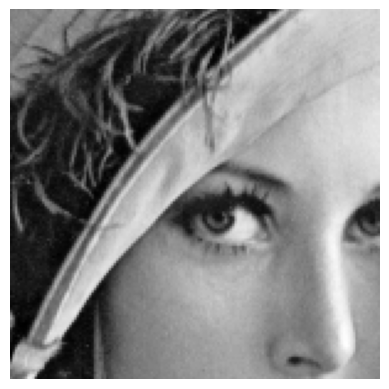

In [12]:
#2.Extract and display the middle section of the image (150 pixels).
import numpy as np

# Convert the image to a NumPy array
img_array = np.array(img)

# Get the center coordinates
height, width = img_array.shape #img dimension
center_x, center_y = width // 2, height // 2 #find center

# Extract a 150x150 section from the center
section = img_array[center_y-75:center_y+75, center_x-75:center_x+75]

# Display the cropped section
plt.imshow(section, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

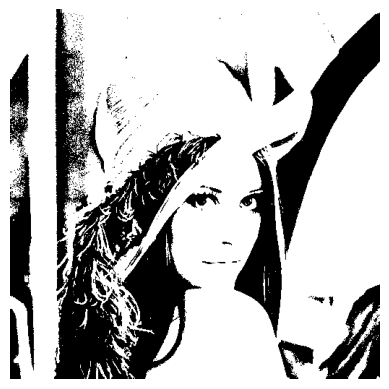

In [13]:
#3. Apply a simple thresold to the image (eg: set all pixel values below 100 to 0)
# Apply threshold: 0 if pixel < 100, else 255
thresholded_img = np.where(img_array < 100, 0, 255) #pixel less than 0 set ot to black otherwsie set it to 255(white)

# Display the thresholded binary image
plt.imshow(thresholded_img, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

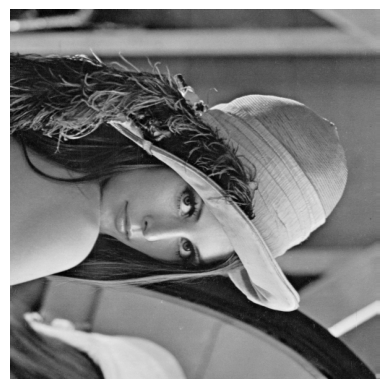

In [14]:
#4.Rotate the image 90 degree clockwise and display the result.
# Rotate image by 90 degrees clockwise using Pillow
rotated_img = img.rotate(-90, expand=True)

# Display the rotated image
plt.imshow(rotated_img, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

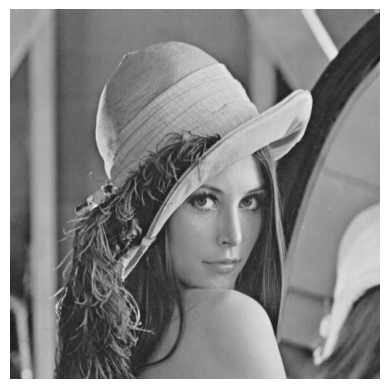

In [15]:
#5. Convert the grayscale image to an RGB image.
# Convert grayscale to RGB (replicating the grayscale values across R, G, B channels)
rgb_img = img.convert('RGB')

# Display the converted RGB image using matplotlib
plt.imshow(rgb_img)
plt.axis('off')  # Hide axes
plt.show()

Exercise 3: Image Compression and Decompression using PCA.

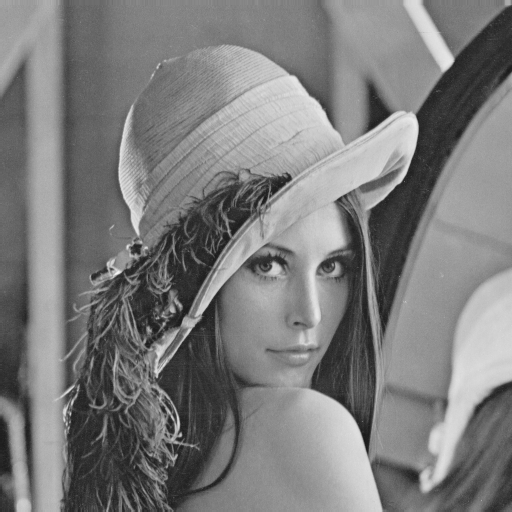

(512, 512)


In [45]:
# image compression and decompression using PCA
# 1: load and prepare data

img = img.convert('L')
img_array = np.array(img)

display(img)

print(img_array.shape)

In [47]:
# center the dataset by minimizing mean from it
mean = np.mean(img_array, axis=0)
centered_img = img_array - mean
centered_img.shape

(512, 512)

In [49]:
# finding covariance
covariance_matrix = np.cov(centered_img, rowvar=False)
print(covariance_matrix)

[[1547.97431507 1547.97431507 1506.00528987 ... -465.93783635
  -438.04106531 -395.61007828]
 [1547.97431507 1547.97431507 1506.00528987 ... -465.93783635
  -438.04106531 -395.61007828]
 [1506.00528987 1506.00528987 1488.59955586 ... -518.98051079
  -493.05615903 -451.90074609]
 ...
 [-465.93783635 -465.93783635 -518.98051079 ... 3083.22850034
  3062.97256834 3029.2839408 ]
 [-438.04106531 -438.04106531 -493.05615903 ... 3062.97256834
  3071.93287901 3052.93071184]
 [-395.61007828 -395.61007828 -451.90074609 ... 3029.2839408
  3052.93071184 3068.69178082]]


In [51]:
# 2. Eigen decomposition and Identifying principal components

# computing eigen values and eigen vectors
eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)


# sorting indices and eigen values in descending order
sorted_indices = np.argsort(eigen_values)[::-1]
eigenvalues = eigen_values[sorted_indices]

# eigen vectors corresponding to the highest eigen values in descending order
eigenvectors = eigen_vectors[:, sorted_indices]

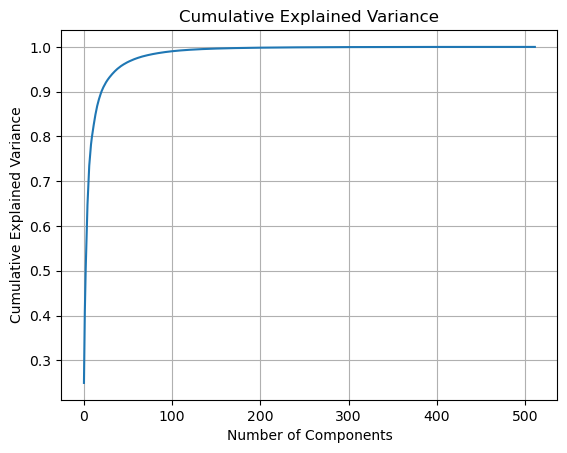

In [53]:
# identifying principal components
explained_variance_ratio = eigenvalues/ np.sum(eigenvalues)
plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

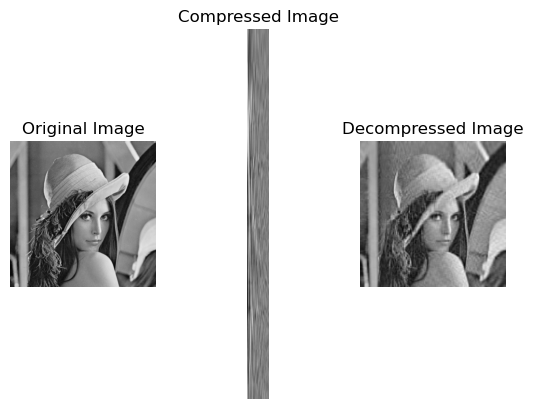

In [55]:
# reconstruction and experiment

# transform the original data by multiplying it with the selected eigen vectors
k = 30
components = eigenvectors[:,:k]

compressed_data = np.dot(centered_img, components)

# attempting to build then image with the features with most information
decompressed_data = np.dot(compressed_data, components.T) + mean

#Original image
plt.subplot(1,3,1)
plt.imshow(img, cmap ='gray')
plt.title("Original Image")
plt.axis('off')

#Compressed image
plt.subplot(1,3,2)
plt.imshow(compressed_data, cmap='gray')
plt.title("Compressed Image")
plt.axis('off')

#Decompressed image
plt.subplot(1,3,3)
plt.imshow(decompressed_data, cmap='gray')
plt.title("Decompressed Image")
plt.axis('off')

plt.show()

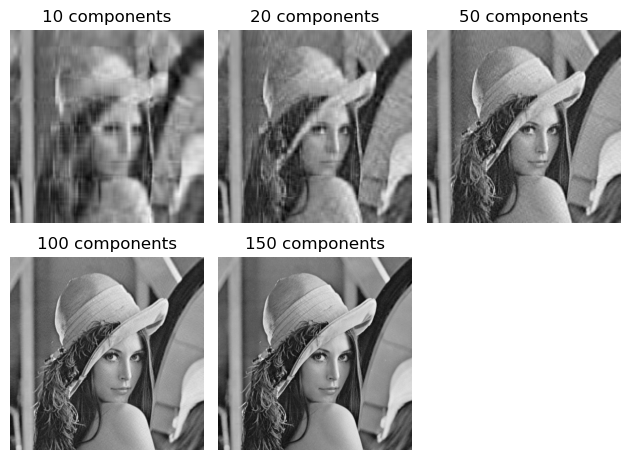

In [57]:
k1 = 10
k2 = 20
k3 = 50
k4 = 100
k5 = 150

components1 = eigenvectors[:,:k1]
components2 = eigenvectors[:,:k2]
components3 = eigenvectors[:,:k3]
components4 = eigenvectors[:,:k4]
components5 = eigenvectors[:,:k5]

compressed_data1 = np.dot(centered_img, components1)
compressed_data2 = np.dot(centered_img, components2)
compressed_data3 = np.dot(centered_img, components3)
compressed_data4 = np.dot(centered_img, components4)
compressed_data5 = np.dot(centered_img, components5)

decompressed_data1 = np.dot(compressed_data1, components1.T) + mean
decompressed_data2 = np.dot(compressed_data2, components2.T) + mean
decompressed_data3 = np.dot(compressed_data3, components3.T) + mean
decompressed_data4 = np.dot(compressed_data4, components4.T) + mean
decompressed_data5 = np.dot(compressed_data5, components5.T) + mean

#Decompressed images

plt.subplot(2,3,1)
plt.imshow(decompressed_data1, cmap='gray')
plt.title("10 components")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(decompressed_data2, cmap='gray')
plt.title("20 components")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(decompressed_data3, cmap='gray')
plt.title("50 components")
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(decompressed_data4, cmap='gray')
plt.title("100 components")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(decompressed_data5, cmap='gray')
plt.title("150 components")
plt.axis('off')

plt.tight_layout()
plt.show()